In [25]:
import sys
import os
import scipy
import gzip
from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### MRS 2D (1)

In [44]:
answer_f = open('/data/project/Alzheimer/YSscript/EM_MRS/data/npvaf/MRS_2D/500_1_0.1_0.1/M1-2_M1-8_input/9/npvaf.txt','r')

input_dir = '/data/project/Alzheimer/YSscript/EM_MRS/data/combinedoutput/MRS_2D/500_1_0.1_0.1/M1-2_M1-8_input/9/'

clement_f = open(input_dir + 'CLEMENT_hard_1st.membership.txt','r')
clement_list = []
for fline in clement_f:
    membership = str(fline.rstrip())

    clement_list.append(membership)
clement_f.close()
print(len(clement_list))


answer_df = pd.DataFrame(columns=['ID','block1','block2','CLUSTER'])
clement_df = pd.DataFrame(columns=['ID','block1','block2','CLUSTER'])

idx = 0
for fline in answer_f:
    ftab = fline.rstrip().split('\t')
    if ftab[0] == '':
        continue
    ID = ftab[0]

    block1_vaf = float(ftab[1])
    block2_vaf = float(ftab[2])
#     block1_vaf = float(ftab[1])*2
#     block2_vaf = float(ftab[2])*2    

    membership = ftab[3]
    
    answer_df.loc[idx] = ID, block1_vaf, block2_vaf, membership
    
    clement_df.loc[idx] = ID, block1_vaf, block2_vaf, clement_list[idx]
    idx += 1
answer_f.close()

500


In [45]:
sm_ec =  open(input_dir + 'CLEMENT_decision.results.txt','r')
for fline in sm_ec:
    if fline.startswith('NUM_CLONE'):
        print(fline)
    if fline.startswith('NUM_CHILD'):
        print(fline)
    if fline.startswith('score'):
        print(fline)
sm_ec.close()

NUM_CLONE	4

NUM_CHILD	3

score	468/500



In [46]:
sm_ec =  open(input_dir + '/CLEMENT_decision.mixture.txt','r')
for fline in sm_ec:
    print(fline)
sm_ec.close()

0.0891	0.0693	0.0297	0.9604	0.8416

0.6327	0.102	0.0306	0.898	0.2653



In [28]:
day = '230426'
output_dir = '/data/project/Alzheimer/EM_cluster/00.RESULT/'+day+'/01.cellData/example'
os.makedirs(output_dir, exist_ok=True)

#### Answer

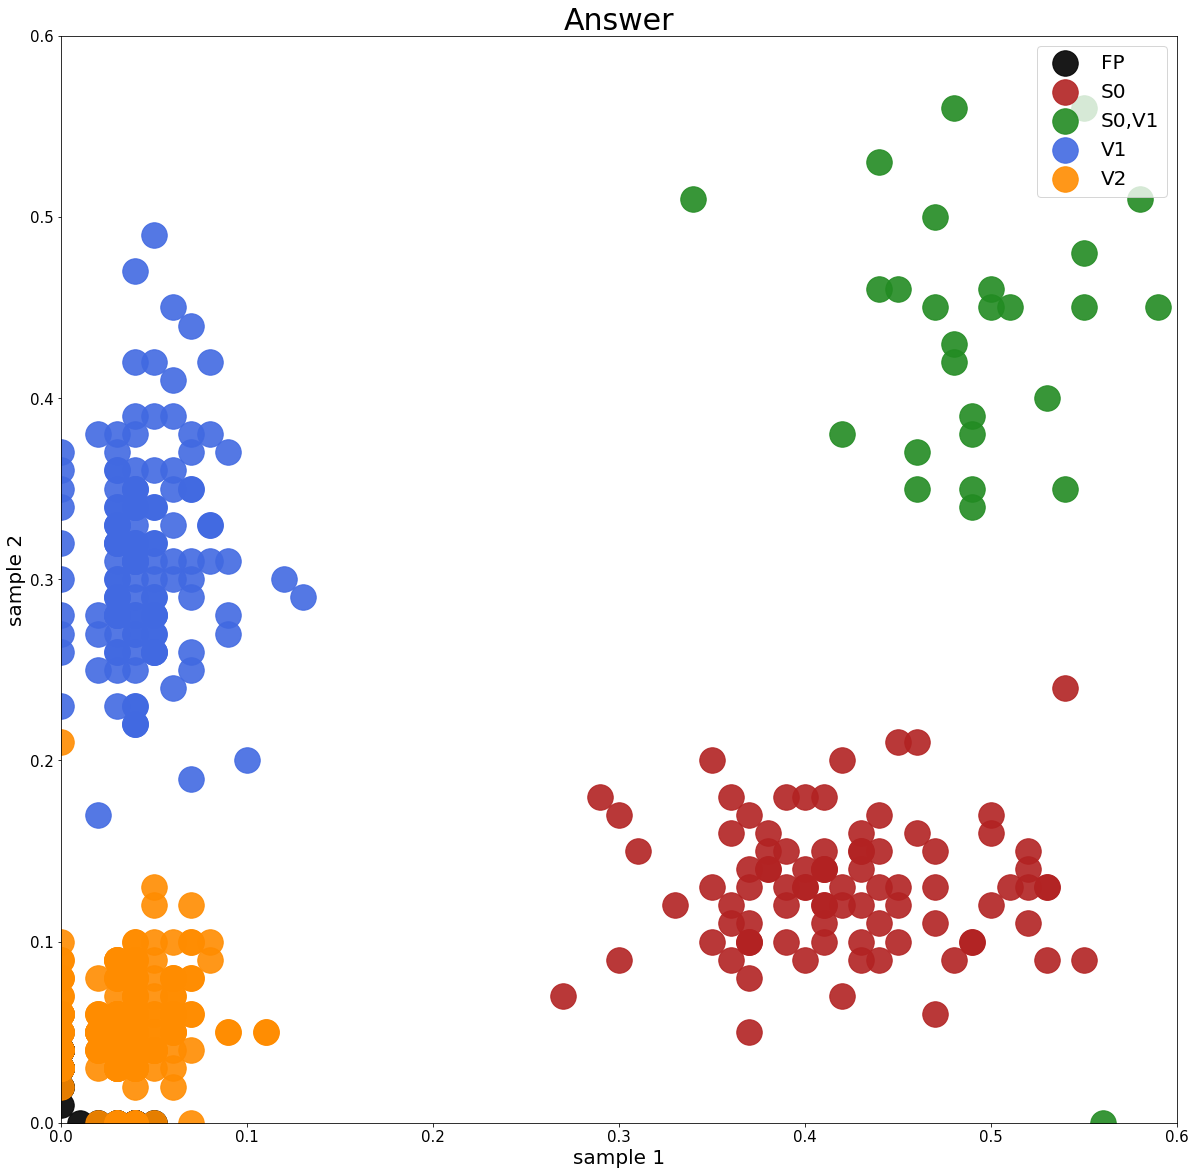

In [29]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot()
plt.tick_params(axis = 'x', labelsize = 15)
plt.tick_params(axis = 'y', labelsize = 15)
ax.set_xlabel('sample 1', fontsize = 20)
ax.set_ylabel('sample 2', fontsize = 20)
ax.set_title('Answer', fontsize=30)
sc = ax.set_xlim(0, 0.6); ax.set_ylim(0, 0.6)

for group_name, group_idx in answer_df.groupby('CLUSTER').groups.items():
    y = answer_df.iloc[group_idx,2]
    x = answer_df.iloc[group_idx,1]
#     ax.scatter(x,y, alpha = 0.9, s=300,color='firebrick')

    # color_list = firebrick royalblue darkorange forestgreen mediumorchid
    
    if group_name == 'S0':
        ax.scatter(x,y, label=group_name, alpha = 0.9, s=650,color='firebrick')
    elif group_name == 'V1':
        ax.scatter(x,y, label=group_name, alpha = 0.9, s=650,color='royalblue')
    elif group_name == 'V2':
        ax.scatter(x,y, label=group_name, alpha = 0.9, s=650,color='darkorange')
    elif group_name == 'S0,V1':
        ax.scatter(x,y, label=group_name, alpha = 0.9, s=650,color='forestgreen')
    elif group_name == 'S0,V2':
        ax.scatter(x,y, label=group_name, alpha = 0.9, s=650,color='mediumorchid')       
    elif group_name == 'FP':
        ax.scatter(x,y, label=group_name, alpha = 0.9, s=650,color='black')
ax.legend(loc = 'upper right', fontsize = 20)        
# ax.figure.savefig('/data/project/Alzheimer/EM_cluster/00.RESULT/01.cellData/2D_Answer_phylogeny.pdf')

#### clement

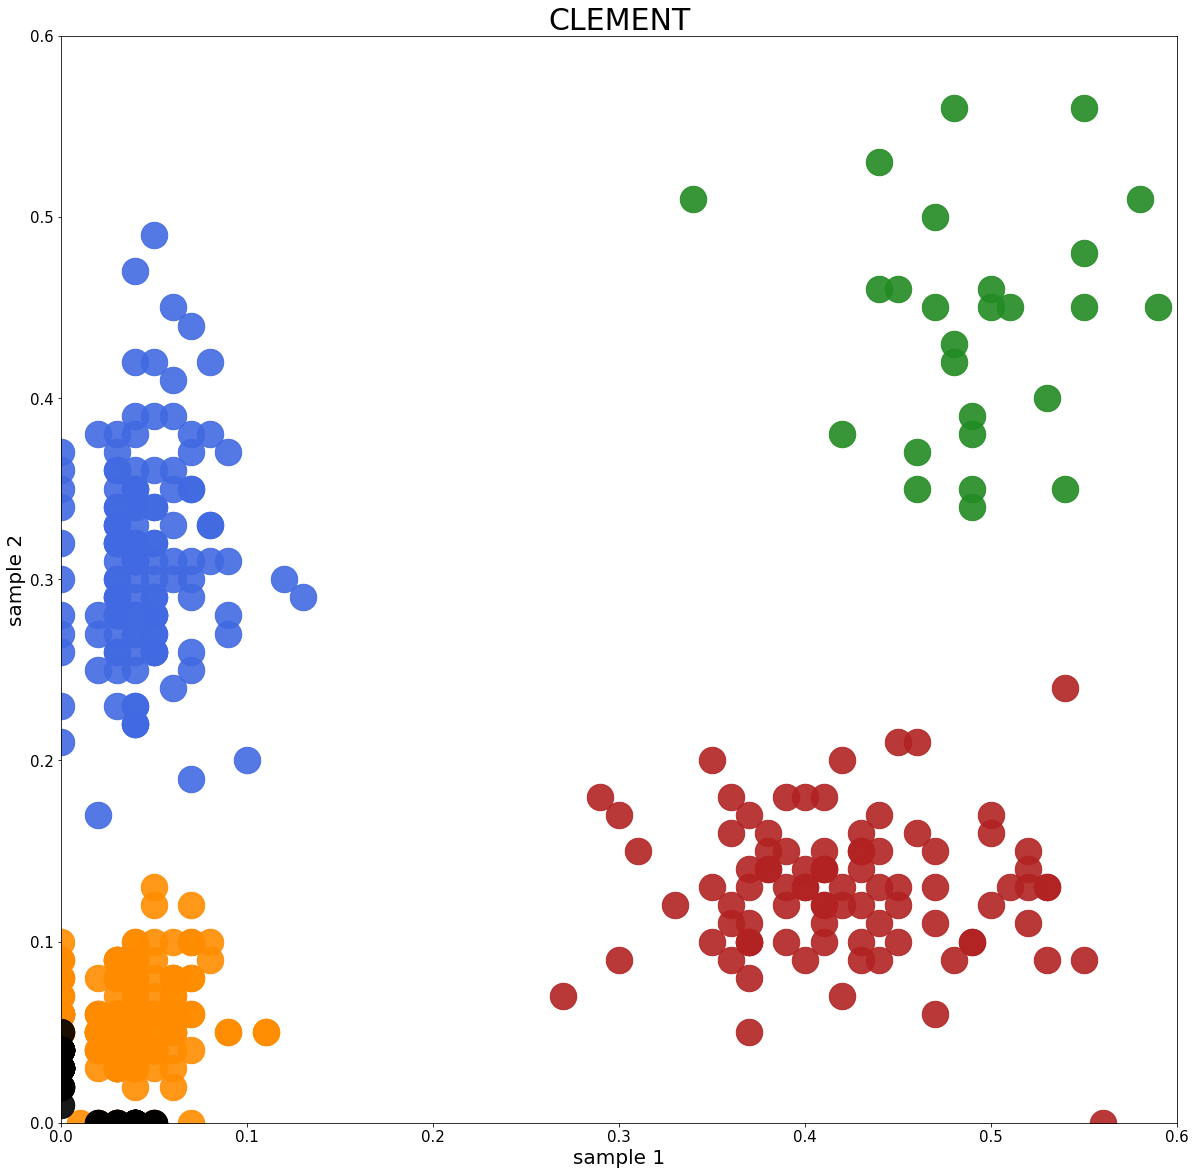

In [33]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot()
plt.tick_params(axis = 'x', labelsize = 15)
plt.tick_params(axis = 'y', labelsize = 15)
ax.set_xlabel('sample 1', fontsize = 20)
ax.set_ylabel('sample 2', fontsize = 20)
ax.set_title('CLEMENT', fontsize=30)
sc = ax.set_xlim(0, 0.6); ax.set_ylim(0, 0.6)

for group_name, group_idx in clement_df.groupby('CLUSTER').groups.items():
    y = answer_df.iloc[group_idx,2]
    x = answer_df.iloc[group_idx,1]
    
    # color_list = firebrick royalblue darkorange forestgreen mediumorchid
    
    if group_name == '1':
        ax.scatter(x,y, label=group_name, alpha = 0.9, s=700,color='darkorange') 
    elif group_name == '4':
        ax.scatter(x,y, label=group_name, alpha = 0.9, s=700,color='firebrick') 
    elif group_name == '2':
        ax.scatter(x,y, label=group_name, alpha = 0.9, s=700,color='black') 
    elif group_name == '5':
        ax.scatter(x,y, label=group_name, alpha = 0.9, s=700,color='mediumorchid') 
    elif group_name == '3':
        ax.scatter(x,y, label=group_name, alpha = 0.9, s=700,color='forestgreen')        
    elif group_name == '0':
        ax.scatter(x,y, label=group_name, alpha = 0.9, s=700,color='royalblue') 
# ax.legend(loc = 'upper right', fontsize = 20)        
ax.figure.savefig(output_dir + '/2D_CLEMENT_1.pdf')

### MRS 2D (2)

In [47]:
answer_f = open('/data/project/Alzheimer/YSscript/EM_MRS/data/npvaf/MRS_2D/500_2_0.0_0.0/M1-5_M1-6_input/4/npvaf.txt','r')

input_dir = '/data/project/Alzheimer/YSscript/EM_MRS/data/combinedoutput/MRS_2D/500_2_0.0_0.0/M1-5_M1-6_input/4/'

clement_f = open(input_dir + 'CLEMENT_hard_1st.membership.txt','r')
clement_list = []
for fline in clement_f:
    membership = str(fline.rstrip())

    clement_list.append(membership)
clement_f.close()
print(len(clement_list))


answer_df = pd.DataFrame(columns=['ID','block1','block2','CLUSTER'])
clement_df = pd.DataFrame(columns=['ID','block1','block2','CLUSTER'])

idx = 0
for fline in answer_f:
    ftab = fline.rstrip().split('\t')
    if ftab[0] == '':
        continue
    ID = ftab[0]

    block1_vaf = float(ftab[1])
    block2_vaf = float(ftab[2])
#     block1_vaf = float(ftab[1])*2
#     block2_vaf = float(ftab[2])*2    

    membership = ftab[3]
    
    answer_df.loc[idx] = ID, block1_vaf, block2_vaf, membership
    
    clement_df.loc[idx] = ID, block1_vaf, block2_vaf, clement_list[idx]
    idx += 1
answer_f.close()

500


In [48]:
sm_ec =  open(input_dir + 'CLEMENT_decision.results.txt','r')
for fline in sm_ec:
    if fline.startswith('NUM_CLONE'):
        print(fline)
    if fline.startswith('NUM_CHILD'):
        print(fline)
    if fline.startswith('score'):
        print(fline)
sm_ec.close()

NUM_CLONE	5

NUM_CHILD	3

score	478/500



In [49]:
sm_ec =  open(input_dir + '/CLEMENT_decision.mixture.txt','r')
for fline in sm_ec:
    print(fline)
sm_ec.close()

0.07	0.7	0.8	0.91	0.18

0.62	0.19	0.87	0.31	0.16



In [39]:
day = '230426'
output_dir = '/data/project/Alzheimer/EM_cluster/00.RESULT/'+day+'/01.cellData/example'
os.makedirs(output_dir, exist_ok=True)

#### Answer

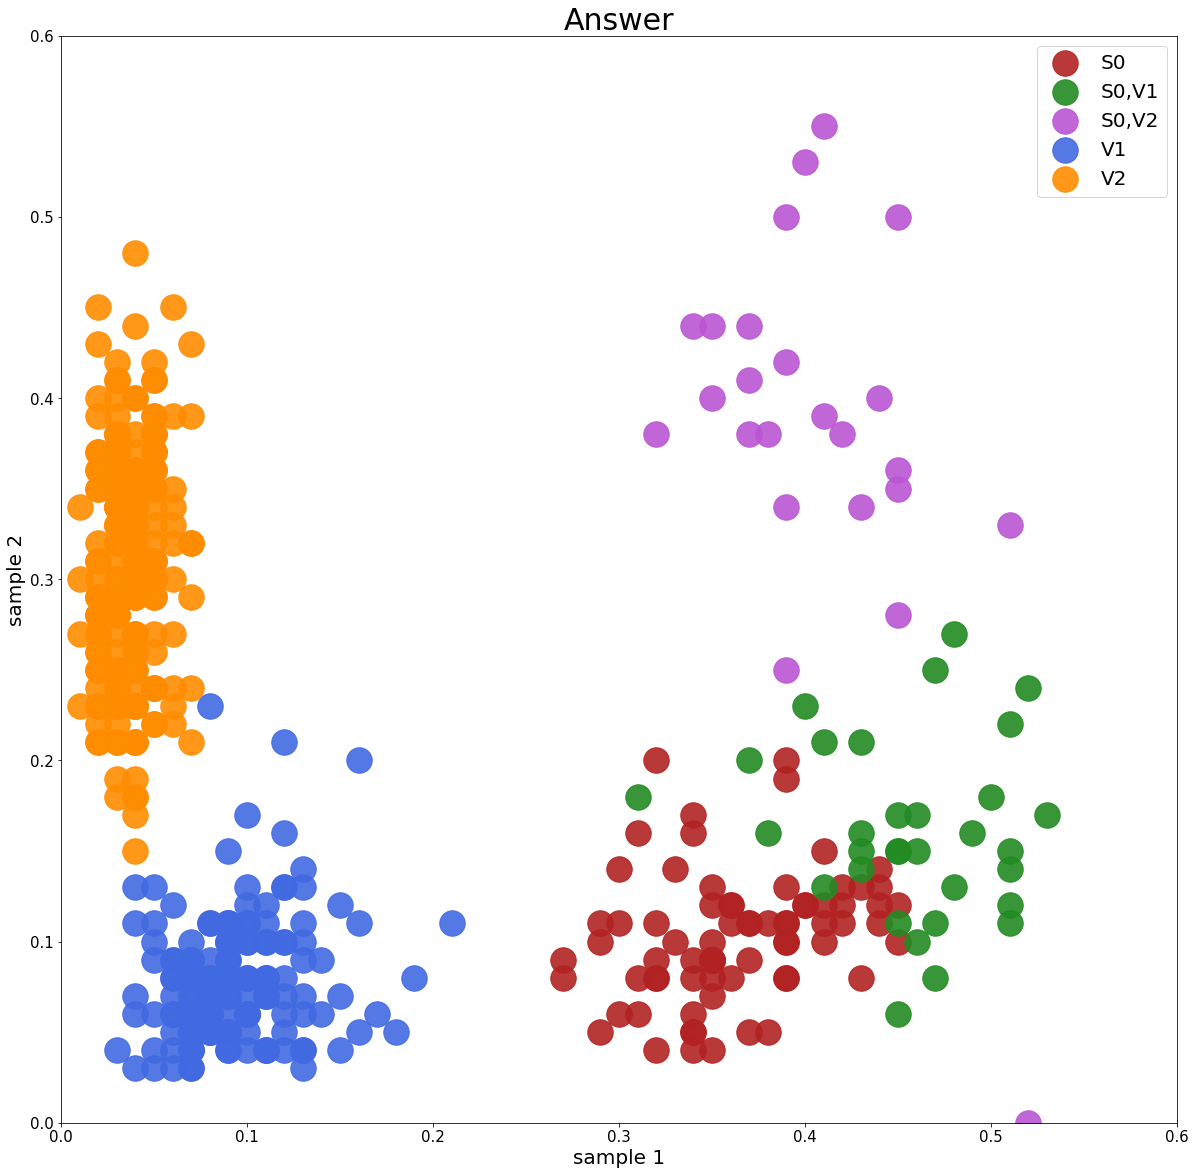

In [40]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot()
plt.tick_params(axis = 'x', labelsize = 15)
plt.tick_params(axis = 'y', labelsize = 15)
ax.set_xlabel('sample 1', fontsize = 20)
ax.set_ylabel('sample 2', fontsize = 20)
ax.set_title('Answer', fontsize=30)
sc = ax.set_xlim(0, 0.6); ax.set_ylim(0, 0.6)

for group_name, group_idx in answer_df.groupby('CLUSTER').groups.items():
    y = answer_df.iloc[group_idx,2]
    x = answer_df.iloc[group_idx,1]
#     ax.scatter(x,y, alpha = 0.9, s=300,color='firebrick')

    # color_list = firebrick royalblue darkorange forestgreen mediumorchid
    
    if group_name == 'S0':
        ax.scatter(x,y, label=group_name, alpha = 0.9, s=650,color='firebrick')
    elif group_name == 'V1':
        ax.scatter(x,y, label=group_name, alpha = 0.9, s=650,color='royalblue')
    elif group_name == 'V2':
        ax.scatter(x,y, label=group_name, alpha = 0.9, s=650,color='darkorange')
    elif group_name == 'S0,V1':
        ax.scatter(x,y, label=group_name, alpha = 0.9, s=650,color='forestgreen')
    elif group_name == 'S0,V2':
        ax.scatter(x,y, label=group_name, alpha = 0.9, s=650,color='mediumorchid')       
    elif group_name == 'FP':
        ax.scatter(x,y, label=group_name, alpha = 0.9, s=650,color='black')
ax.legend(loc = 'upper right', fontsize = 20)        
# ax.figure.savefig('/data/project/Alzheimer/EM_cluster/00.RESULT/01.cellData/2D_Answer_phylogeny.pdf')

#### clement

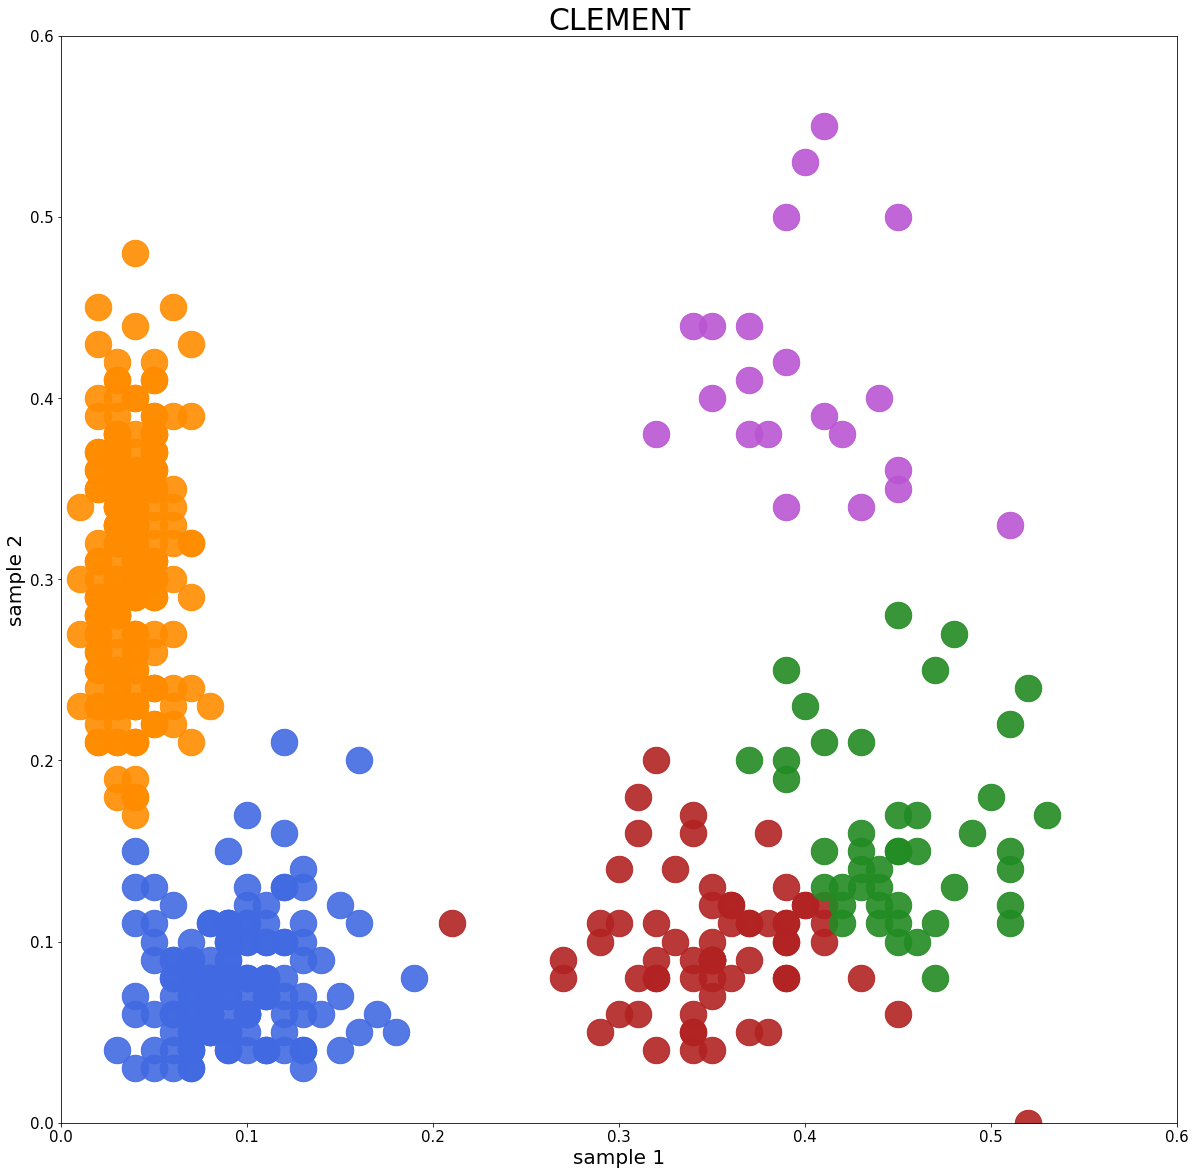

In [42]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot()
plt.tick_params(axis = 'x', labelsize = 15)
plt.tick_params(axis = 'y', labelsize = 15)
ax.set_xlabel('sample 1', fontsize = 20)
ax.set_ylabel('sample 2', fontsize = 20)
ax.set_title('CLEMENT', fontsize=30)
sc = ax.set_xlim(0, 0.6); ax.set_ylim(0, 0.6)

for group_name, group_idx in clement_df.groupby('CLUSTER').groups.items():
    y = answer_df.iloc[group_idx,2]
    x = answer_df.iloc[group_idx,1]
    
    # color_list = firebrick royalblue darkorange forestgreen mediumorchid
    
    if group_name == '1':
        ax.scatter(x,y, label=group_name, alpha = 0.9, s=700,color='firebrick') 
    elif group_name == '4':
        ax.scatter(x,y, label=group_name, alpha = 0.9, s=700,color='royalblue')
    elif group_name == '2':
        ax.scatter(x,y, label=group_name, alpha = 0.9, s=700,color='mediumorchid') 
    elif group_name == '5':
        ax.scatter(x,y, label=group_name, alpha = 0.9, s=700,color='black')
    elif group_name == '3':
        ax.scatter(x,y, label=group_name, alpha = 0.9, s=700,color='forestgreen')       
    elif group_name == '0':
        ax.scatter(x,y, label=group_name, alpha = 0.9, s=700,color='darkorange') 
# ax.legend(loc = 'upper right', fontsize = 20)  
ax.figure.savefig(output_dir + '/2D_CLEMENT_2.pdf')